# Simple Pandas

In [181]:
import pandas as pd

In [ ]:
df = pd.read_csv('../day2/data/food_coded.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns',None, 'display.precision',3):
    print(df)

## Files Reading

In [183]:
df_xl = pd.read_excel('../day2/data/test_label_encoder.xlsx')
df_xl

,Weather,TimeOfWeek,TimeOfDay,TrafficJam
0,Clear,Workday,Morning,Yes
1,Clear,Workday,Evening,Yes
2,Clear,Weekend,Lunch,No
3,Rainy,Workday,Morning,Yes
4,Rainy,Workday,Lunch,Yes
5,Rainy,Workday,Evening,Yes
6,Rainy,Weekend,Lunch,No
7,Snowy,Workday,Morning,Yes
8,Snowy,Workday,Evening,Yes
9,Snowy,Weekend,Lunch,No


In [184]:
missing_df = pd.read_csv("../day2/data/ex_missing_value.csv")
missing_df

,car,color,volume,weight,co2
0,Honda Civic,Red,1600.0,1252.0,94
1,Suzuki Swift,White,1300.0,NaN,101
2,Mazda 3,Black,NaN,1280.0,104
3,Benz CLA,Black,NaN,1465.0,102
4,Mini Cooper,Red,1500.0,NaN,105
5,Ford Focus,Blue,2000.0,1328.0,105
6,Benz C-Class,Silver,NaN,1365.0,99
7,Benz E-Class,While,2100.0,1605.0,115
8,Ford Fiesta,Red,1500.0,1112.0,98
9,Volvo XC70,Silver,2000.0,1746.0,117


## Data Cleansing

### NaN value handling

In [185]:
missing_df.isnull()

,car,color,volume,weight,co2
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,True,False
5,False,False,False,False,False
6,False,False,True,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [186]:
missing_df.isnull().any()

car       False
color     False
volume     True
weight     True
co2       False
dtype: bool

In [187]:
missing_df.isnull().sum()

car       0
color     0
volume    3
weight    2
co2       0
dtype: int64

In [188]:
dropped_df = missing_df.copy().dropna()
print(dropped_df)

            car   color  volume  weight  co2
0   Honda Civic     Red  1600.0  1252.0   94
5    Ford Focus    Blue  2000.0  1328.0  105
7  Benz E-Class   While  2100.0  1605.0  115
8   Ford Fiesta     Red  1500.0  1112.0   98
9    Volvo XC70  Silver  2000.0  1746.0  117


In [189]:
missing_df

,car,color,volume,weight,co2
0,Honda Civic,Red,1600.0,1252.0,94
1,Suzuki Swift,White,1300.0,NaN,101
2,Mazda 3,Black,NaN,1280.0,104
3,Benz CLA,Black,NaN,1465.0,102
4,Mini Cooper,Red,1500.0,NaN,105
5,Ford Focus,Blue,2000.0,1328.0,105
6,Benz C-Class,Silver,NaN,1365.0,99
7,Benz E-Class,While,2100.0,1605.0,115
8,Ford Fiesta,Red,1500.0,1112.0,98
9,Volvo XC70,Silver,2000.0,1746.0,117


In [190]:
mean_weight = missing_df['weight'].mean()
mean_vol = missing_df['volume'].mean()
missing_df['weight'].fillna(mean_weight, inplace=True)
missing_df['volume'].fillna(mean_vol, inplace=True)
missing_df

C:\Users\User\AppData\Local\Temp\ipykernel_54596\1761808358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_df['weight'].fillna(mean_weight, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_54596\1761808358.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,car,color,volume,weight,co2
0,Honda Civic,Red,1600.000000,1252.000,94
1,Suzuki Swift,White,1300.000000,1394.125,101
2,Mazda 3,Black,1714.285714,1280.000,104
3,Benz CLA,Black,1714.285714,1465.000,102
4,Mini Cooper,Red,1500.000000,1394.125,105
5,Ford Focus,Blue,2000.000000,1328.000,105
6,Benz C-Class,Silver,1714.285714,1365.000,99
7,Benz E-Class,While,2100.000000,1605.000,115
8,Ford Fiesta,Red,1500.000000,1112.000,98
9,Volvo XC70,Silver,2000.000000,1746.000,117


In [191]:
fdf = pd.read_csv('../day2/data/food_coded.csv')
cols2fill = fdf.isna().any()
cols2fill

GPA                  True
Gender              False
breakfast           False
calories_chicken    False
calories_day         True
                    ...  
type_sports          True
veggies_day         False
vitamins            False
waffle_calories     False
weight               True
Length: 61, dtype: bool

In [192]:
cols = fdf.columns[fdf.isna().any() == True]
len(cols)

34

In [193]:
def fillNumberNA(df, cols):
    for c in cols:
        try:
            df[c].fillna(df[c].mean(), inplace=True)
        except:
            df[c].ffill(inplace=True)
    return df

In [194]:
filled = fillNumberNA(fdf, cols)

C:\Users\User\AppData\Local\Temp\ipykernel_54596\1868823910.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mean(), inplace=True)


In [195]:
cols = filled.columns[filled.isna().any() == True]
print(cols)
print(filled.isna().any())

Index([], dtype='object')
GPA                 False
Gender              False
breakfast           False
calories_chicken    False
calories_day        False
                    ...  
type_sports         False
veggies_day         False
vitamins            False
waffle_calories     False
weight              False
Length: 61, dtype: bool


## Data Encoding

In [196]:
filled.to_csv('../day2/data/filled_data.csv', index=False)

In [197]:
decode = pd.read_excel('../day2/data/test_label_encoder.xlsx')
decode

,Weather,TimeOfWeek,TimeOfDay,TrafficJam
0,Clear,Workday,Morning,Yes
1,Clear,Workday,Evening,Yes
2,Clear,Weekend,Lunch,No
3,Rainy,Workday,Morning,Yes
4,Rainy,Workday,Lunch,Yes
5,Rainy,Workday,Evening,Yes
6,Rainy,Weekend,Lunch,No
7,Snowy,Workday,Morning,Yes
8,Snowy,Workday,Evening,Yes
9,Snowy,Weekend,Lunch,No


In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
def getEncode(df):
    cols = decode.columns
    for c in cols:
        encoder = LabelEncoder()
        encoder.fit(df[c])
        df[c] = encoder.transform(df[c])
    return df

In [200]:
encoded = getEncode(decode)
encoded.to_csv('../day2/data/encoded.csv', index=True)
encoded

,Weather,TimeOfWeek,TimeOfDay,TrafficJam
0,0,1,2,1
1,0,1,0,1
2,0,0,1,0
3,1,1,2,1
4,1,1,1,1
5,1,1,0,1
6,1,0,1,0
7,2,1,2,1
8,2,1,0,1
9,2,0,1,0


## Data Scaling

In [201]:
from sklearn.preprocessing import StandardScaler
samp_data = [[2,    20000],
             [3.5,  55000],
             [1.75, 2150],
             [3.14, 4130],
             [2.25, 2564]]
scaler = StandardScaler()
scaler.fit(samp_data)
scaled_data = scaler.transform(samp_data)
scaled_data

array([[-0.78178395,  0.15968317],
       [ 1.43919317,  1.88935351],
       [-1.1519468 , -0.72244871],
       [ 0.90615866, -0.62459879],
       [-0.41162109, -0.70198918]])

In [203]:
mis_data = pd.read_csv('../day2/data/ex_missing_value.csv')
mis_data.tail(10)

,car,color,volume,weight,co2
0,Honda Civic,Red,1600.0,1252.0,94
1,Suzuki Swift,White,1300.0,NaN,101
2,Mazda 3,Black,NaN,1280.0,104
3,Benz CLA,Black,NaN,1465.0,102
4,Mini Cooper,Red,1500.0,NaN,105
5,Ford Focus,Blue,2000.0,1328.0,105
6,Benz C-Class,Silver,NaN,1365.0,99
7,Benz E-Class,While,2100.0,1605.0,115
8,Ford Fiesta,Red,1500.0,1112.0,98
9,Volvo XC70,Silver,2000.0,1746.0,117


In [211]:
mis_data['weight'].ffill(inplace=True)
mis_data['volume'].ffill(inplace=True)
scaler = StandardScaler()
scaler.fit(mis_data[['weight', 'volume']])
scaled_mis_data = scaler.transform(mis_data[['weight', 'volume']])
scaled_mis_data

C:\Users\User\AppData\Local\Temp\ipykernel_54596\2128490203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mis_data['weight'].ffill(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_54596\2128490203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

array([[-0.75935984, -0.19127301],
       [-0.75935984, -1.14763808],
       [-0.60186299, -1.14763808],
       [ 0.43874124, -1.14763808],
       [ 0.43874124, -0.51006137],
       [-0.33186838,  1.08388041],
       [-0.12374753,  1.08388041],
       [ 1.22622552,  1.40266877],
       [-1.54684412, -0.51006137],
       [ 2.01933469,  1.08388041]])

## Data Splitting

In [217]:
unsplit_data = pd.read_csv('../day2/data/test-standard-scaler.csv')
unsplit_data

,car,color,volume,weight,co2
0,Honda Civic,Red,1.6,1252,94
1,Suzuki Swift,White,1.3,990,101
2,Mazda 3,Black,2.2,1280,104
3,Benz CLA,Black,1.5,1465,102
4,Mini Cooper,Red,1.5,1140,105
5,Ford Focus,Blue,2.0,1328,105
6,Benz C-Class,Silver,2.1,1365,99
7,Benz E-Class,While,2.1,1605,115
8,Ford Fiesta,Red,1.5,1112,98
9,Volvo XC70,Silver,2.0,1746,117


In [234]:
X = unsplit_data.iloc[:, :-1]
y = unsplit_data.iloc[:, -1]

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [238]:
print(X_test)
print(X_train)


            car  color  volume  weight
7  Benz E-Class  While     2.1    1605
4   Mini Cooper    Red     1.5    1140
            car   color  volume  weight
1  Suzuki Swift   White     1.3     990
2       Mazda 3   Black     2.2    1280
5    Ford Focus    Blue     2.0    1328
0   Honda Civic     Red     1.6    1252
6  Benz C-Class  Silver     2.1    1365
3      Benz CLA   Black     1.5    1465
8   Ford Fiesta     Red     1.5    1112
9    Volvo XC70  Silver     2.0    1746


In [239]:
print(y_test)
print(y_train)

7    115
4    105
Name: co2, dtype: int64
1    101
2    104
5    105
0     94
6     99
3    102
8     98
9    117
Name: co2, dtype: int64


In [251]:
import numpy as np
data = {
    'Feature1':np.random.randn(100),
    'Feature2':np.random.randint(1,10,100),
    'Feature3':np.random.choice(['A','B','C',100]),
    'target':np.random.randint(0,2,100)
}
df = pd.DataFrame(data)
encoder = LabelEncoder()
encoder.fit(df['Feature3'])
df['Feature3'] = encoder.transform(df['Feature3'])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [252]:
scl = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

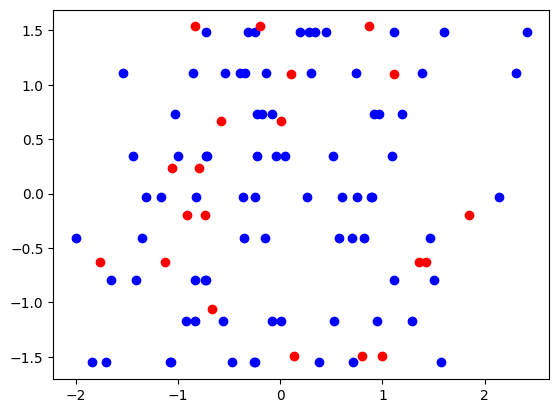

In [253]:
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c='blue', label='train')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='red', label='test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()